# Pizza Hut Data

### import packages

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import statsmodels.formula.api as sm
import numpy as np
import statsmodels.stats.diagnostic as sms
from statsmodels.compat import lzip
import plotly.offline as py
import plotly.graph_objs as go
import sklearn.model_selection as m_sel
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
py.offline.init_notebook_mode()

### loading data

In [170]:
df = pd.read_csv('Pizza.csv')
df.head()

PizzaPrice  BurgerPrice  RoomTemperature  DeliveryMode     Income  \
0   11.716233     9.716233        24.937096             2  21.772162   
1    8.695689     6.695689        24.772566             1  43.172762   
2    7.056686     5.056686        25.033494             2  18.661751   
3   12.499111    10.499111        24.978631             1  92.107600   
4    8.208723     6.208723        24.996846             2  51.482776   

   softdrinkPrice  Location   PizzaDemand  
0       20.251733         2  15383.265370  
1       14.877143         1  16036.037969  
2       16.041785         1  15317.391311  
3       22.401484         1  17327.343321  
4       27.352832         1  16077.301577

### generating correlation between feature

In [171]:
corr = df.corr()
corr

PizzaPrice  BurgerPrice  RoomTemperature  DeliveryMode  \
PizzaPrice         1.000000     1.000000        -0.056121     -0.063815   
BurgerPrice        1.000000     1.000000        -0.056121     -0.063815   
RoomTemperature   -0.056121    -0.056121         1.000000     -0.023415   
DeliveryMode      -0.063815    -0.063815        -0.023415      1.000000   
Income             0.163955     0.163955        -0.091006     -0.144249   
softdrinkPrice    -0.116256    -0.116256        -0.064765      0.015619   
Location          -0.059603    -0.059603        -0.161151      0.161165   
PizzaDemand        0.219790     0.219790        -0.075070     -0.143826   

                   Income  softdrinkPrice  Location  PizzaDemand  
PizzaPrice       0.163955       -0.116256 -0.059603     0.219790  
BurgerPrice      0.163955       -0.116256 -0.059603     0.219790  
RoomTemperature -0.091006       -0.064765 -0.161151    -0.075070  
DeliveryMode    -0.144249        0.015619  0.161165    -0.143826  
Income           1.000000       -0.051338 -0.192671     0.974370  
softdrinkPrice  -0.051338        1.000000  0.151559    -0.271651  
Location        -0.192671        0.151559  1.000000    -0.219684  
PizzaDemand      0.974370       -0.271651 -0.219684     1.000000

### Checking correlation

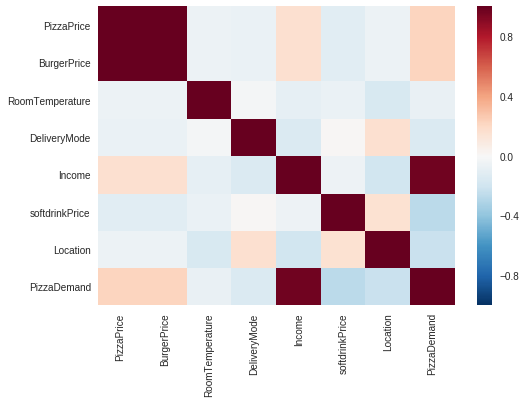

In [172]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

### Generating scatter matrix

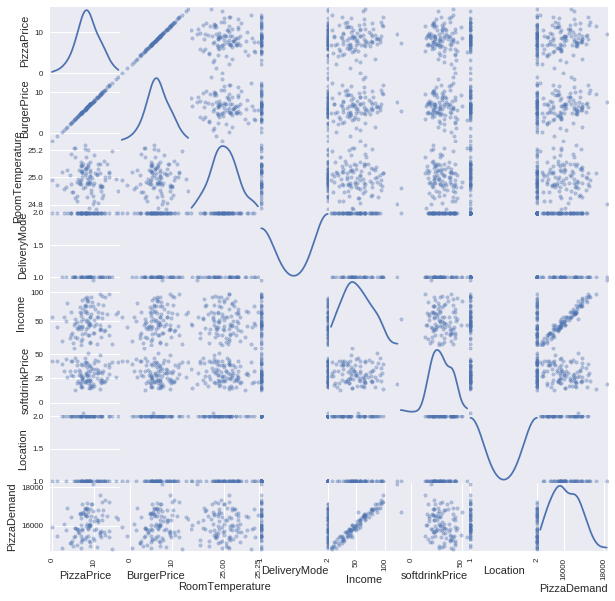

In [173]:
pd.scatter_matrix(df, alpha=0.4, figsize=(10, 10), diagonal='kde')
plt.show()

## Ridge Regression

### Importing Date - dividing training and test

In [174]:
df = pd.read_csv('Pizza.csv').drop(['Location','DeliveryMode'], axis=1)
X = pd.get_dummies(df).drop('PizzaDemand', axis=1)
col = X.columns
X = scale(X)
y = df.PizzaDemand
y = scale(y) 
X_train, X_test, y_train, y_test = m_sel.train_test_split(X, y, test_size=0.2, random_state=42)

### Genertaing random alpha value

In [175]:
#alphas = 10**np.linspace(-10,-5,100)*0.5
alphas = np.logspace(-10,10,1000)

### Using Ridge Regression with different alphas
Calculating beta's coefficient and mse for different alpha

In [176]:
ridge = Ridge(normalize=True)
coefs = []
mse = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    mse.append(mean_squared_error(ridge.predict(X_test),y_test))
    coefs.append(ridge.coef_)

In [177]:
coefs = np.array(coefs).reshape(len(alphas), len(X_train[0]))

### Plotting MSE vs log(alpha)

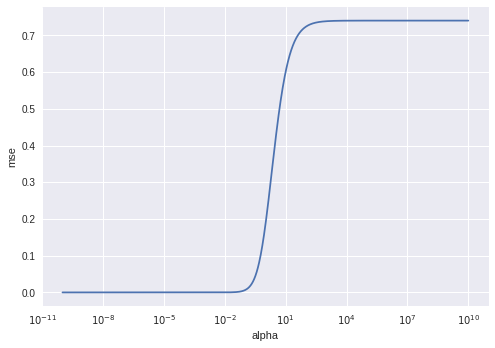

In [178]:
ax = plt.gca()
ax.plot(alphas, mse)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [179]:
trace = go.Scatter(
    x = np.log(alphas),
    y = mse,
    name = 'mse',
    line = dict(
        width = 3,
    )
)

data = [trace]


# Edit the layout
layout = dict(title = 'mse VS alphas',
              xaxis = dict(title = 'aplhas'),
              yaxis = dict(title = 'mse'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='mse-alpha-ridge-1')

### Plotting beta's value vs alpha

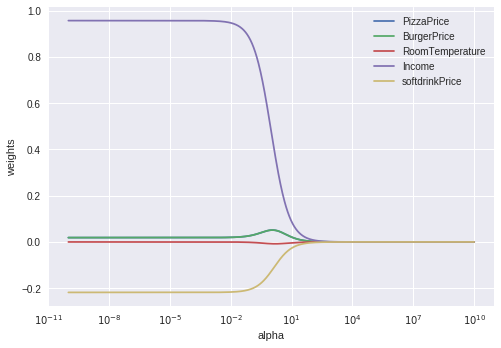

In [180]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(col)
plt.show()

In [181]:
data = []

for beta in range(len(col)):
    
    trace = go.Scatter(
        x = np.log(alphas),
        y = coefs[:,beta],
        name = col[beta],
        line = dict(
            width = 3,
        )
    )
    
    data.append(trace)


# Edit the layout
layout = dict(title = 'weight VS alphas',
              xaxis = dict(title = 'aplhas'),
              yaxis = dict(title = 'weights'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='weight-alpha-ridge-2')


### Using Rigged Cross Validation to get best alpha value

In [182]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.3936192742241435e-06

### Using the alph value obatined with rigged regression

In [183]:
ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

2.6522011031762043e-08

## Lasso Regression

### Using Lasso Regression with different alphas
Calculating beta's coefficient and mse for different alpha

In [184]:
lasso = Lasso(max_iter=10000, normalize=False)
coefs = []
mse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), scale(y_train))
    coefs.append(lasso.coef_)
    mse.append(mean_squared_error(lasso.predict(X_test),y_test))

In [185]:
coefs = np.array(coefs).reshape(len(alphas), len(col))

### Plotting MSE vs log(2*alpha)

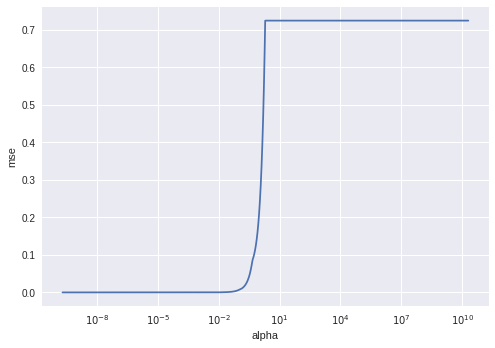

In [186]:
ax = plt.gca()
ax.plot(alphas*2, mse)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [187]:
trace = go.Scatter(
    x = np.log(2*alphas),
    y = mse,
    name = 'mse',
    line = dict(
        width = 3,
    )
)

data = [trace]


# Edit the layout
layout = dict(title = 'mse VS alphas : Lasso',
              xaxis = dict(title = 'aplhas'),
              yaxis = dict(title = 'mse'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='mse-alpha-lasso-1')


### Plotting beta's value vs alpha

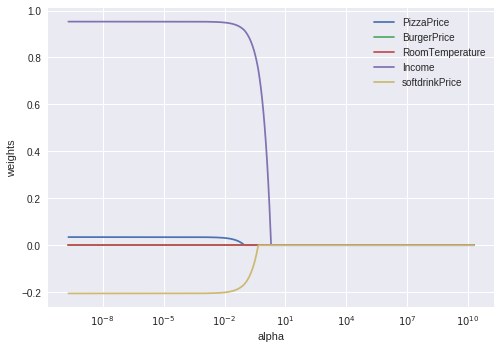

In [188]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(col)
plt.show()

In [189]:
data = []

for beta in range(len(col)):
    
    trace = go.Scatter(
        x = np.log(alphas),
        y = coefs[:,beta],
        name = col[beta],
        line = dict(
            width = 3,
        )
    )
    
    data.append(trace)


# Edit the layout
layout = dict(title = 'weight VS alphas',
              xaxis = dict(title = 'aplhas'),
              yaxis = dict(title = 'weights'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='weight-alpha-lasso-2')


### Using Lasso Cross Validation to get best alpha value

In [190]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.00011287310944668255

### Using the alph value obatined with lasso regression

In [191]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

6.5082971714049544e-08

## Model1

### Dividing data into training and testing

In [197]:
X_osl = df
col = X_osl.columns
X_osl = scale(X_osl)
X_osl = pd.DataFrame(X_osl, columns=col)

X = df.loc[:,['Income']]
Y = df.loc[:,['PizzaDemand']]
X = scale(X)
Y = scale(Y)
X_train, X_test , Y_train, Y_test = m_sel.train_test_split(X, Y, test_size=0.2, random_state=42)

In [198]:
results = sm.ols(formula="PizzaDemand ~ Income ", data=X_osl[:80]).fit()
print (results.summary()) 

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1474.
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           2.07e-52
Time:                        09:09:32   Log-Likelihood:                 8.2309
No. Observations:                  80   AIC:                            -12.46
Df Residuals:                      78   BIC:                            -7.698
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0049      0.025     -0.198      0.8

### Genertaing Linear Regression Model

In [199]:
regr = linear_model.LinearRegression()

### Fitting Data on the model 

In [200]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Coefficient value and Intercept value after fitting

In [201]:
print('Coefficients: \t', regr.coef_)
print('Intercept: \t', regr.intercept_)

Coefficients: 	 [[ 0.98164346]]
Intercept: 	 [ 0.00947092]


### Calculating Mean Square, RMS, and  Variance :

In [202]:
mean = np.mean((regr.predict(X_test) - Y_test) ** 2)
rms = np.sqrt(np.mean((regr.predict(X_test) - Y_test) ** 2))
variance_score = regr.score(X_test, Y_test)

In [203]:
print("Mean squared error : %.2f"% mean)
print("Root mean squared error : %.2f"% rms)
print('Variance score: %.2f' % variance_score)

Mean squared error : 0.06
Root mean squared error : 0.25
Variance score: 0.91


### Plotting graphs for test data


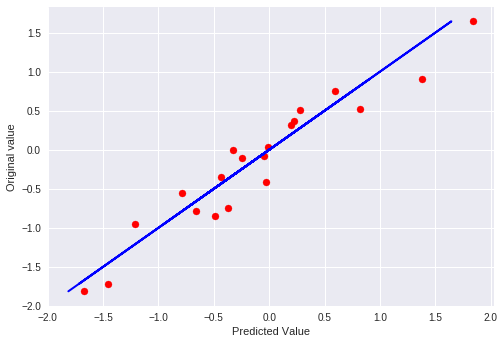

In [204]:
plt.scatter(regr.predict(X_test), Y_test,  color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Original value')
plt.plot(Y_test, Y_test, color='blue',linewidth=2)
plt.show()

In [224]:
t=np.array(regr.predict(X_test))
trace = go.Scatter(
    x=t,
    y=Y_test,
    mode='markers',
    name='Predicted vs Original',
    line=dict(shape='linear')
)
trace1 = go.Scatter(
    x=Y_test,
    y=Y_test,
    mode='lines',
    name='x = y',
    line=dict(shape='linear')
)
data = [trace, trace1]
layout = dict(
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Scatter plot for Normal Regression')


### Residual description for Model

### Histogram for residuals

In [210]:
residuals = regr.predict(X_test)- (Y_test)
df_res = pd.DataFrame(residuals)

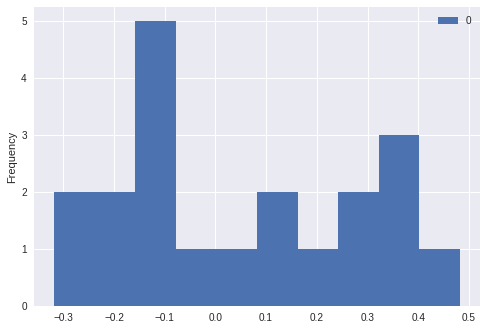

In [212]:
df_res.plot(kind='hist')
plt.show()

In [215]:
trace = [go.Histogram(x = (regr.predict(X_test) - Y_test))]

layout = go.Layout(title = 'Histogram Plot for residuals', 
                   xaxis = dict(title = 'Residuals'),
                   yaxis = dict(title = 'Frequency'),
)
Fig = go.Figure(data = trace, layout = layout)
py.iplot(Fig, filename = 'Pizza')

### Box Plot for residuals

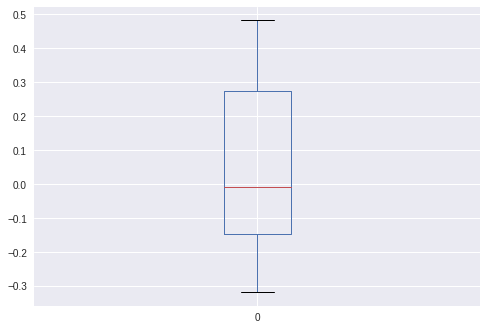

In [216]:
df_res.plot(kind='box')
plt.show()

### Regression Diagnostic

In [217]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 0.83422335238037515), ('p-value', 0.71042375865209695)]